In [45]:
import pandas as pd
import numpy as np

In [46]:
data = pd.read_csv("./clean_data.csv")
data['average_latency'] = np.mean(data[['svr1', 'svr2', 'svr3', 'svr4']])
data['total_throughput'] = data['upload_bitrate_mbits/sec'] + data['download_bitrate_rx_mbits/sec']

# features = ['total_throughput', 'latitude', 'longitude', 'square_id', 'average_latency']
features = ['total_throughput', 'latitude', 'longitude', 'average_latency']
X = data[features]

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

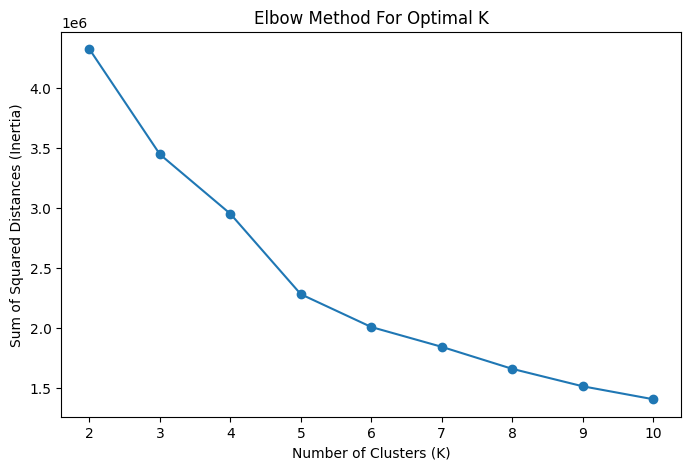

In [47]:
# Standardise the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K) using the Elbow Method
sse = []  # Sum of squared distances to closest cluster center
for k in range(2, 11):  # Trying different values of K from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


# Plot SSE for each K to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.show()

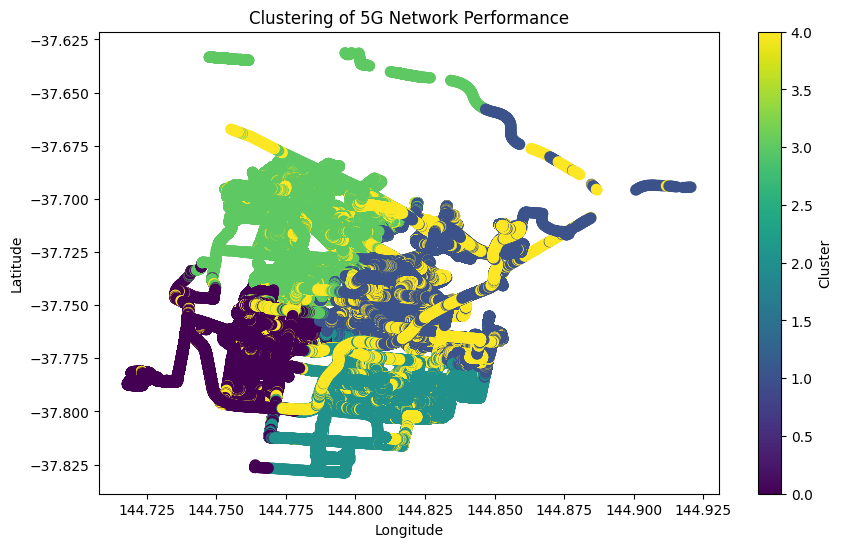

In [52]:
optimal_k = 5

# Fit the final KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels back to the original dataset
data['cluster'] = kmeans.labels_

# Evaluate the clusters using Silhouette Score
# silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
# print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

# Optionally: Visualize the clusters using latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of 5G Network Performance')
plt.colorbar(label='Cluster')
plt.show()

In [50]:
# Save scaler and model
import pickle

with open("clustering_model_kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("clustering_scaler_kmeans.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [60]:
data[features + ['cluster']]

,total_throughput,latitude,longitude,average_latency,cluster
0,23.16,-37.712603,144.859029,295.470442,1
1,22.75,-37.712627,144.859119,295.470442,1
2,24.05,-37.712695,144.859188,295.470442,1
3,20.03,-37.712993,144.859051,295.470442,1
4,26.60,-37.713143,144.859034,295.470442,1
...,...,...,...,...,...
1947438,82.60,-37.712731,144.852618,295.470442,4
1947439,92.30,-37.712754,144.852593,295.470442,4
1947440,93.70,-37.712767,144.852562,295.470442,4
1947441,92.40,-37.712774,144.852535,295.470442,4
